# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(17, 8)})


### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

Для начала посмотрим на данные:

In [195]:
credit_data = pd.read_csv("creditcard.csv")

In [196]:
credit_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [197]:
credit_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Как итог, nullевых значений нет, целевой признак Class. Посмотрим, какие уникальные элементы имеет эта колонка

In [198]:
credit_data.Class.unique()

array([0, 1], dtype=int64)

Задача определена. Бинарный классификатор с целевым признаком Class. Разделим данные на X and y

In [199]:
target = 'Class'
X = credit_data.drop([target], axis=1)
y = credit_data[target]

Попробуем использовать два способа масштабирования, а в конце выберем лучший. Будем использоваться StandardScaler и MinMaxScaler

In [200]:
scaler = StandardScaler()
df_standart = scaler.fit_transform(X)

In [201]:
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(X)

Теперь разделим наш датасет на тренеровочную и тестовую части соответственно для df_standard и df_minmax

In [202]:
x_train_standart, x_test_standart, y_train_standart, y_test_standart = train_test_split(df_standart, y, test_size=0.2, random_state=42)
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(df_minmax, y, test_size=0.2, random_state=42)

Посмотрим, как распределена целевая переменная. Возможно, единиц или нулей намного больше

In [203]:
y_train_standart.value_counts()

0    227451
1       394
Name: Class, dtype: int64

Ого! Нулей больше практически в 580 раз. Это нужно будет учесть при построении модели.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

Буду использовать 4 алгоритма классификации: KNN, SVC, LogisticRegression и DecisionTree

In [204]:
names = ['LogReg', 'DesTree','SVC', 'KNN']
classifiers = [LogisticRegression(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]

Для каждого напишу свои параметры, чтобы найти в будущем лучшие. (Изначально гиперпараметров было в разы больше, но мой комп не выдержал)

In [205]:
param_knn = {
    'n_neighbors' : np.arange(4, 6),
    # 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p' : [1, 2],
}

param_svc = {
    'C' : np.arange(0.2, 1.2, 0.2),
    'class_weight' : ['balanced'],
    'random_state' : [42],
    'max_iter' : [1000],
}

param_logreg = [
    {
        'penalty' : ['l2'],
        'C' : np.arange(0.2, 1.2, 0.2),
        'class_weight' : ['balanced'],
        'random_state' : [42],
        'n_jobs' : [-1],
    },
    {
        'penalty' : ['l1', 'l2'],
        'C' : np.arange(0.2, 1.2, 0.2),
        'solver' : ['saga'],
        'class_weight' : ['balanced'],
        'random_state' : [42],
        'n_jobs' : [-1],
    }
]

param_dectree = {
    'criterion' : ["gini", "entropy"],
    'random_state' : [42]
}

In [206]:
params = [param_logreg, param_dectree, param_svc, param_knn]

Данная функция будет брать как аргументы x и y данные (в нашем случае standard и minmax), далее вычисляться лучшие параметры для моделей выше, для каждой метрики! Таким образом мы получим полный набор результатов и выберем лучший.

class_scores - это dict, который будет хранить данные о метриках для каждого класса! (Чтобы потом можно было визуализировать)

In [207]:
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
class_scores_standart = {x : dict() for x in scores}
class_scores_minmax = {x : dict() for x in scores}

In [208]:
def grid_search(x_train, y_train, class_scores, show_result=True):
    for score in scores:
        if show_result:
            print(f"{score.upper()}")
        for i, classifier in enumerate(classifiers):
            search = GridSearchCV(
                estimator=classifier,
                param_grid=params[i],
                scoring=score,
                n_jobs=-1,
                error_score='raise',
            )
            search.fit(x_train, y_train)
            class_scores[score][names[i]] = search.best_score_

            if show_result:
                print(f"{names[i]}: best params {search.best_params_} best scores {search.best_score_}")

In [209]:
# grid_search(x_train_standart, y_train_standart, class_scores_standard)

На ACCURACY спустя несколько часов я получила такие результаты...
```
LogReg: best params: {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42} best score: 0.9763391779499221
DesTree: best params: {'criterion': 'entropy', 'random_state': 42} best score: 0.9992538787333494
SVC: best params: {'C': 1.0, 'class_weight': 'balanced', 'random_state': 42} best score: 0.997191072878492
```

Это было слишком долго! Ну ладно, придется так, по чувству выбирать гиперпараметры у SVC и KNN, а у LogReg и DecisionTree попробуем подобрать (примерное время каждого около 10 минут)

In [210]:
classifiers = [LogisticRegression(), DecisionTreeClassifier()]
grid_search(x_train_standart, y_train_standart, class_scores_standart)

ACCURACY
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42} best scores 0.9763391779499221
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.9992538787333494
PRECISION
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42} best scores 0.0630207451375883
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.78717757729067
RECALL
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'} best scores 0.9111327491074326
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.7792599805258034
F1
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42} best scores 0.11780244013443122
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.7825019092962415
RO

In [211]:
grid_search(x_train_minmax, y_train_minmax, class_scores_minmax)

ACCURACY
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42} best scores 0.9829269898395839
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.9992363229388401
PRECISION
LogReg: best params {'C': 0.6000000000000001, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'} best scores 0.531856350544816
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.7791931698508312
RECALL
LogReg: best params {'C': 0.8, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 42, 'solver': 'saga'} best scores 0.94677052904901
DesTree: best params {'criterion': 'entropy', 'random_state': 42} best scores 0.7792599805258034
F1
LogReg: best params {'C': 0.2, 'class_weight': 'balanced', 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'} best scores 0.4964351167186859
DesTree: best params {'criterion': 'entropy', 'ran

In [235]:
def write_const(class_scores, y_train, y_pred):
    class_scores['accuracy']['Const'] = accuracy_score(y_train, y_pred)
    class_scores['precision']['Const'] = precision_score(y_train, y_pred)
    class_scores['recall']['Const'] = recall_score(y_train, y_pred)
    class_scores['f1']['Const'] = f1_score(y_train, y_pred)
    class_scores['roc_auc']['Const'] = roc_auc_score(y_train, y_pred)

In [236]:
y_pred_const = np.zeros(len(x_train_standart))
write_const(class_scores_standart, y_train_standart, y_pred_const)

In [237]:
y_pred_const = np.zeros(len(x_train_minmax))
write_const(class_scores_minmax, y_train_minmax, y_pred_const)

Попробуем пока взглянуть на эти два классификатора

<AxesSubplot:title={'center':'StandardScaler'}>

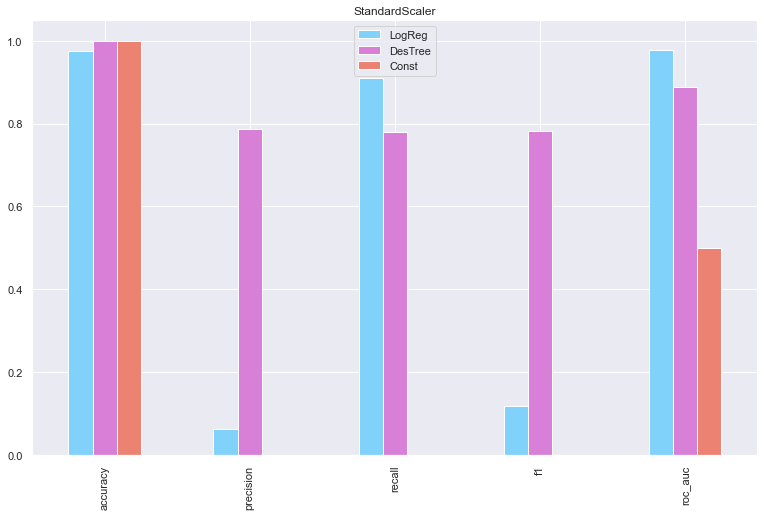

In [240]:
df_scores_standard = pd.DataFrame(class_scores_standart)

df_scores_standard.T.plot.bar(figsize=(13, 8), color=['#81D2FA', '#D87FD8', '#EC8272'], title='StandardScaler')

LogReg дает очень низкие результаты precision и f1(логично, потому что метрика зависит от precision). Однако в остальном, кроме accuracy, LogReg обгоняет Decision Tree. Константа почти у 1 в accuracy. Посмотрим на результаты MinMax Scaler

<AxesSubplot:title={'center':'MinMax Scaler'}>

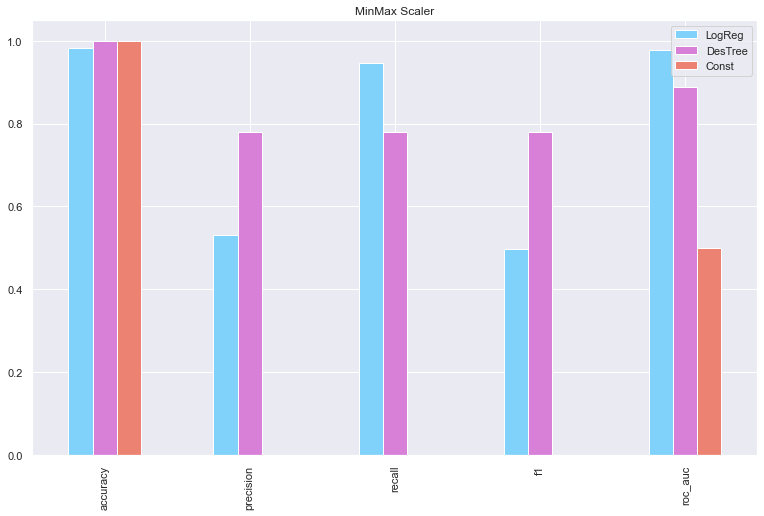

In [241]:
df_scores_minmax = pd.DataFrame(class_scores_minmax)

df_scores_minmax.T.plot.bar(figsize=(13, 8), color=['#81D2FA', '#D87FD8', '#EC8272'], title='MinMax Scaler')

Ого! Precision и f1 выросли, так еще и остальные метрики выросли (кроме ROC_AUC). В будущем, если нам понадобится использовать Precision, выбор будет падать на дерево решений, а в иных случаях на логрег. Посмотрим теперь, что выдают более "тяжелые классификаторы"

In [242]:
# svc = SVC(class_weight='balanced')
knn_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
classifiers = [knn_3] # изначально тут были другие классификаторы...
names = ['KNN_3']

К несчастью, SVC мне пришлось убрать, так как он моделировался достаточно долго. В любом случае, LogReg пока дает впечатляющие результаты на minmax, так что испытаем пока только knn

In [243]:
def get_scores_classifiers(x_train, y_train, class_scores):
    for i, classifier in enumerate(classifiers):
        classifier.fit(x_train, y_train)
        y_pred = classifier.predict(x_train)

        class_scores['accuracy'][names[i]] = accuracy_score(y_train, y_pred)
        class_scores['precision'][names[i]] = precision_score(y_train, y_pred)
        class_scores['recall'][names[i]] = recall_score(y_train, y_pred)
        class_scores['f1'][names[i]] = f1_score(y_train, y_pred)
        class_scores['roc_auc'][names[i]] = roc_auc_score(y_train, y_pred)

        print(f"{names[i]} done")


In [244]:
get_scores_classifiers(x_train_standart, y_train_standart, class_scores_standart)

KNN_3 done


In [245]:
get_scores_classifiers(x_train_minmax, y_train_minmax, class_scores_minmax)

KNN_3 done


Это было долго. Теперь посмотрим на общий результат, у кого что больше и снова визуализируем.

In [246]:
def show_result(class_scores):
    for score in class_scores:
        print(score.upper())
        sorted_scores = sorted(class_scores[score].items(), key=lambda x: x[1], reverse=True)
        for name, sc in sorted_scores:
            print(f"{name}: {sc}")

In [247]:
show_result(class_scores_standart)

ACCURACY
KNN_3: 0.9996137725207926
DesTree: 0.9992538787333494
Const: 0.9982707542408216
LogReg: 0.9763391779499221
PRECISION
KNN_3: 0.9722222222222222
DesTree: 0.78717757729067
LogReg: 0.0630207451375883
Const: 0.0
RECALL
LogReg: 0.9111327491074326
KNN_3: 0.799492385786802
DesTree: 0.7792599805258034
Const: 0.0
F1
KNN_3: 0.8774373259052924
DesTree: 0.7825019092962415
LogReg: 0.11780244013443122
Const: 0.0
ROC_AUC
LogReg: 0.9775762029960211
KNN_3: 0.899726408412348
DesTree: 0.8894475334013944
Const: 0.5


In [248]:
show_result(class_scores_minmax)

ACCURACY
KNN_3: 0.9996093835721653
DesTree: 0.9992363229388401
Const: 0.9982707542408216
LogReg: 0.9829269898395839
PRECISION
KNN_3: 0.9692307692307692
DesTree: 0.7791931698508312
LogReg: 0.531856350544816
Const: 0.0
RECALL
LogReg: 0.94677052904901
KNN_3: 0.799492385786802
DesTree: 0.7792599805258034
Const: 0.0
F1
KNN_3: 0.8762169680111266
DesTree: 0.778519030171446
LogReg: 0.4964351167186859
Const: 0.0
ROC_AUC
LogReg: 0.9765192541585617
KNN_3: 0.8997242101366754
DesTree: 0.889438740308368
Const: 0.5


<AxesSubplot:title={'center':'StandardScaler'}>

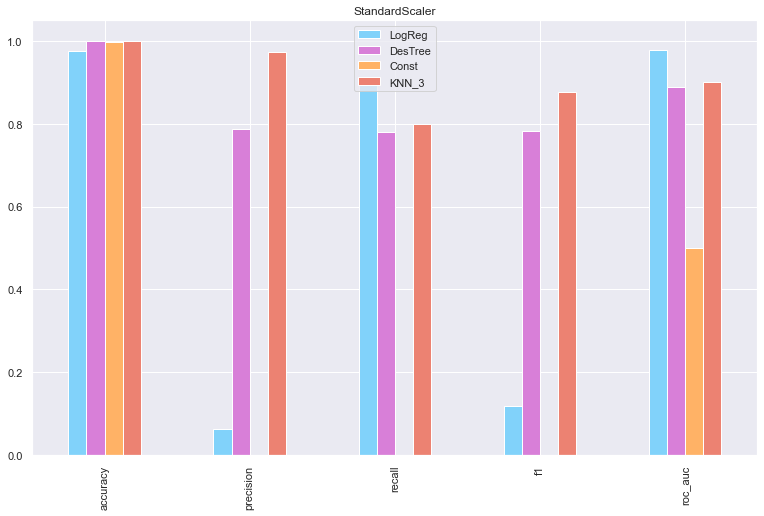

In [249]:
df_scores_standard = pd.DataFrame(class_scores_standart)

df_scores_standard.T.plot.bar(figsize=(13, 8), color=['#81D2FA', '#D87FD8', '#FFB266', '#EC8272'], title='StandardScaler')

В StandardScaler KNN по метрике очень похож в итоге на дерево решений, только в Precision выразительно обгоняет, в остальном чуть больше. Также можно отметить:
- recall и roc_auc самые высокие у LogReg
- precision, accuracy, f1 у KNN_3

<AxesSubplot:title={'center':'MinMax Scaler'}>

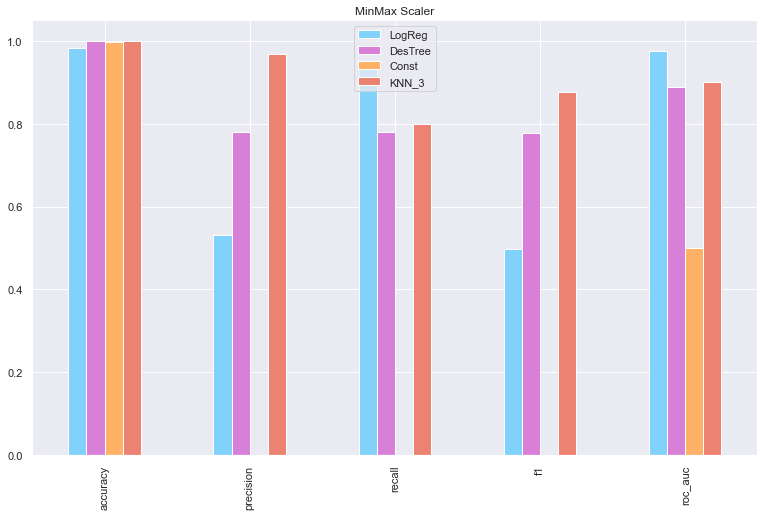

In [250]:
df_scores_minmax = pd.DataFrame(class_scores_minmax)

df_scores_minmax.T.plot.bar(figsize=(13, 8), color=['#81D2FA', '#D87FD8', '#FFB266', '#EC8272'], title='MinMax Scaler')

Тут уже LogReg подрос, как мы видели и на предыдущих графиках. KNN_3 дал похожие результаты как у StandardScaler, так что выводы не изменились. Однако можно предположить, что на классификаторы DecisionTree и KNN масштабирование особо не влияет.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

________________________________________________

Думаю, что банку важнее НЕ ПОТЕРЯТЬ деньги, чем обвинить какого-нибудь человека в мошенничестве. Поэтому банку надо как можно больше поймать мошенников, чем точнее. Выберем полноту для этой задачи.

Полнота самая высокая, как оказалось, у LogReg! Будем прокачивать ее. Причем на данных minmax, так как разница ощутимая.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

_____________

Так как выше я уже перебрала гиперпараметры, здесь я попробую визуализировать и подобрать гиперпараметры уже для конкретное модели - LogReg для minmax

Выше можно посмотреть, что в основном solver = 'saga', (можно еще отметить, что в докстринге по LogRegу написано, что saga подходит для больших данных, а у нас их как раз 227к+). Посмотрим на разную регуляризацию и параметр C.

In [253]:
param_logreg = {
    'penalty' : ['l1', 'l2'],
    'C' : np.arange(0.2, 1.2, 0.2),
}

In [254]:
recall_params_logreg = {'l1': [], 'l2': []}

for penalty in param_logreg['penalty']:
    for c in param_logreg['C']:
        logreg = LogisticRegression(
            C=c,
            penalty=penalty,
            solver='saga', 
            n_jobs=-1,  
            class_weight='balanced', 
            random_state=42)
        
        recall_params_logreg[penalty].append(
            cross_val_score(logreg, x_train_minmax, y_train_minmax, cv=5, scoring='recall')
        )

Посчитаем теперь средние значения:

In [255]:
recall_params_logreg_mean = dict()
for p in recall_params_logreg:
    recall_params_logreg_mean[p] = list(map(lambda x: np.mean(x), recall_params_logreg[p]))

Нарисуем график зависимости Recall от C у l1 и l2

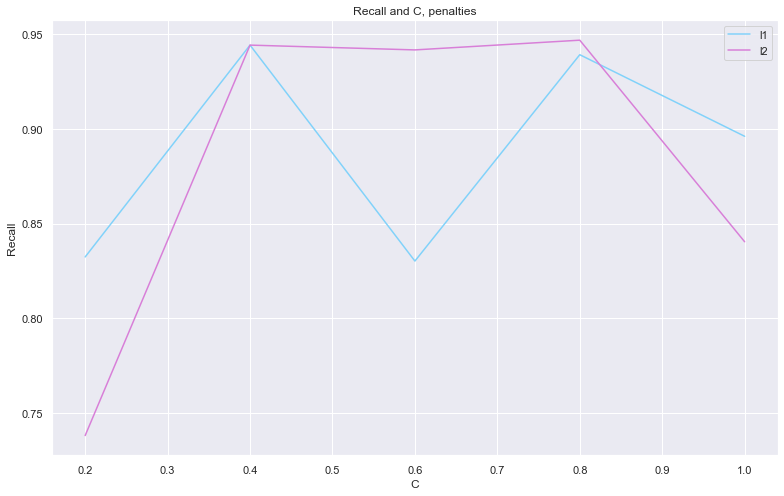

In [256]:
sns.set(rc={'figure.figsize':(13, 8)})

plt.plot(param_logreg['C'], recall_params_logreg_mean['l1'], label='l1', color='#81D2FA')
plt.plot(param_logreg['C'], recall_params_logreg_mean['l2'], label='l2', color='#D87FD8')

plt.xlabel("C")
plt.ylabel("Recall")
plt.title("Recall and C, penalties")
plt.legend()

Интересный график. Можно заметить, что на регуляризации l1 Recall резко падает после 0.4, а начиная с 0.6 повышается, но все еще не обгоняя l2! Таким образом, самая высокая полнота при параметрах c=0.8 penalty=l2

In [257]:
best_logreg = LogisticRegression(
    C=0.8,
    penalty='l2',
    solver='saga', 
    n_jobs=-1, 
    class_weight='balanced', 
    random_state=42,
)
        
print(f"Recall: {np.mean(cross_val_score(best_logreg, x_train_minmax, y_train_minmax, cv=5, scoring='recall'))}")

Recall: 0.94677052904901


Построим теперь ROC-кривую! Так как мы предсказываем мошенников, выберем класс 1.

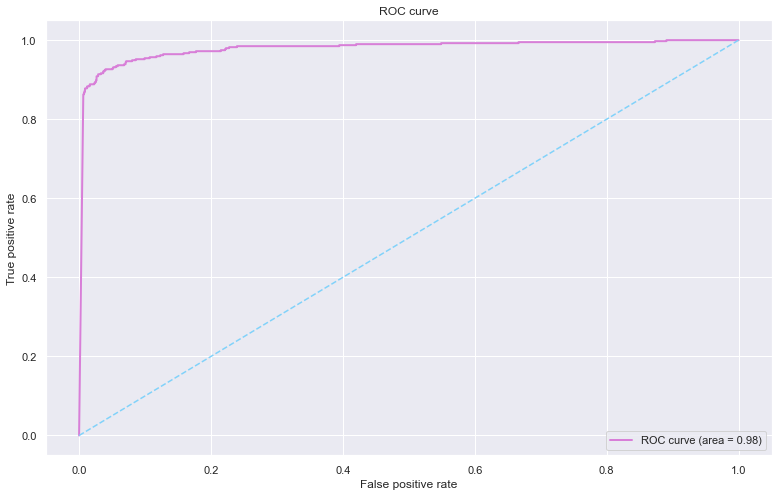

In [258]:
best_logreg.fit(x_train_minmax, y_train_minmax)
y_proba_pred = best_logreg.predict_proba(x_train_minmax)

fpr, tpr, thresholds = roc_curve(y_train_minmax, y_proba_pred.T[1])
plt.plot(fpr, tpr, linewidth=2, label="ROC curve (area = %0.2f)" % auc(fpr, tpr), color='#D87FD8')
plt.plot([0, 1], [0, 1], 'k--', color='#81D2FA')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Area это и есть AUC - площадь под Roc кривой. В целом, 0.98 неплохой результат для нашей модели! Возможно, банк не только поймает мошенников, но и не станет волновать часто клиентов по ложной тревоге.

In [259]:
best_logreg.coef_

array([[  -1.90321855,   -9.6657728 ,   31.23886821, -127.6880765 ,
         160.46993751,   20.12035229,  -47.9303967 ,  -41.34373309,
         -25.17828981,  -75.48402363, -182.87392361,  132.0347248 ,
        -244.89100521,  -26.92332997, -336.23216548,   -2.08801316,
        -146.99493853, -172.04854916,  -49.57734933,   15.66652542,
          15.32329159,   42.27398993,   13.93779855,  -39.8423163 ,
          -4.39509725,  -11.45596358,  -24.95608426,   35.25981235,
          25.43386562,   15.14811019]])

Теперь попробуем как-нибудь преобразовать данные

<AxesSubplot:>

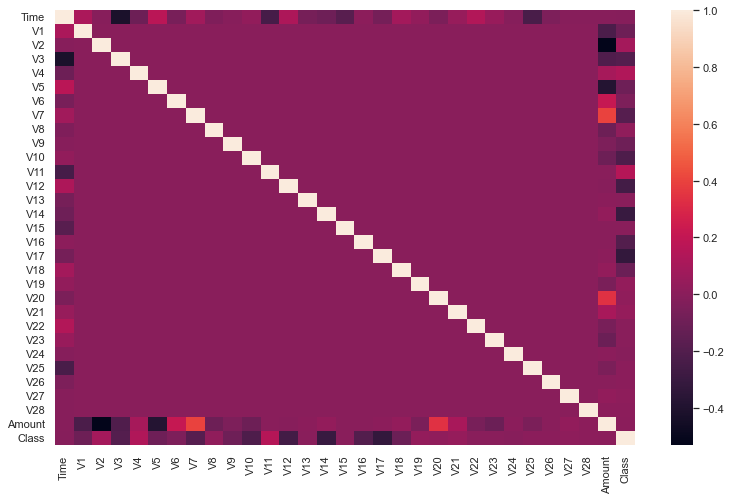

In [260]:
sns.heatmap(credit_data.corr())

<AxesSubplot:>

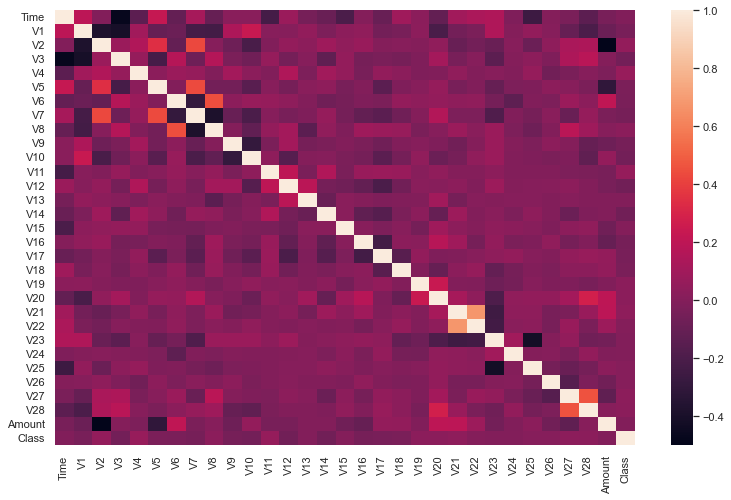

In [261]:
sns.heatmap(credit_data.corr(method='spearman'))

Можно заметить некоторые зависимости. В целом признаков очень много, если смотреть по корреляции Пирсона, то признаки V%d вообще никак не коррелируют. В основном только с Time и Amount. Если смотреть на корреляцию спирмена, которая лучше замечает нелинейные зависимости, признаки V%d становятся уже не такими "независимыми". Поэкспериментируем:

In [279]:
credit_data_upd = credit_data.copy()

target = 'Class'
X_new = credit_data_upd.drop([target], axis=1)
y_new = credit_data_upd[target]

X_new.drop(['V2', 'V3', 'V5', 'V20', 'V7'], axis=1, inplace=True)

scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(X_new)

x_train, x_test, y_train, y_test = train_test_split(x_scaler, y_new, test_size=0.2, random_state=42)

In [280]:
print(f"Recall: {np.mean(cross_val_score(best_logreg, x_train, y_train, cv=5, scoring='recall'))}")

Recall: 0.9593638429081468


Я перепробовала много чего, но лучший результат у этого варианта. Знаменательный момент!!! Страшнаа..Смотрим результат на тестированных данных:

In [281]:
best_logreg.fit(x_train, y_train)
y_pred = best_logreg.predict(x_test)

print(f"Recall: {recall_score(y_test, y_pred)}")

Recall: 0.9489795918367347


Теперь посмотрим что у нас бы получилось без этих преобразований

In [282]:
best_logreg.fit(x_train_minmax, y_train_minmax)
y_pred = best_logreg.predict(x_test_minmax)

print(f"Recall: {recall_score(y_test_minmax, y_pred)}")

Recall: 0.9591836734693877


Вышло больше!!!(Возможно, так делать плохо)
Как итог: датасет без преобразований дал результат лучше на тестовых данных. При этом важно использовать MinMaxScaler, так как StandardScaler дал совсем плохие результаты для LogReg(особенно, если бы нам нужна была точность)

Для себя я сделала несколько выводов:
- действительно, precision и recall могут быть совершенно разными. Раньше я думала, что они отличаются лишь пару десятков
- SVC обрабатывает большие данные очень долго. Я ставила на ночь и только за ~600 минут он смог что-то выдать. Я счаитаю, это тоже важный опыт. Возможно, в будущем мне придется использовать алгоритмы понижения размерности для использования этого алгоритма.
- то же самое можно сказать и про KNN, при большом количестве соседей он работал SVC
- преобразования не всегда дают хороший результат
- рисовать графики важно, нагляднее видно тенденцию или лучший вариант
- accuracy и roc_auc не так сильно зависели от классификатора. Различие (по крайней мере на графике или по сравнению с precision\recall) не такое ощутимое

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

[music](https://www.kaggle.com/purumalgi/music-genre-classification?select=test.csv)

Предположим, вы захотели продавать пластинки или диски по разным жанрам. У вас есть датасет вашей музыкальной коллекции и вы хотите разложить ее на различные музыкальные жанры. Ты знаешь, что жанров всего 10 и у тебя уже есть какой-то набор с готовыми нажнрами. Твой продукт должен быть очень качественными и нацелен на определенную аудиторию, так что теперь нужно научить модель хорошо определять музыкальные жанры.

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [ ]:
target = 'Class'
cat_features = ['Artist Name', 'Track Name']
X = df.drop([target] + cat_features, axis=1)
y = df[target]

<AxesSubplot:>

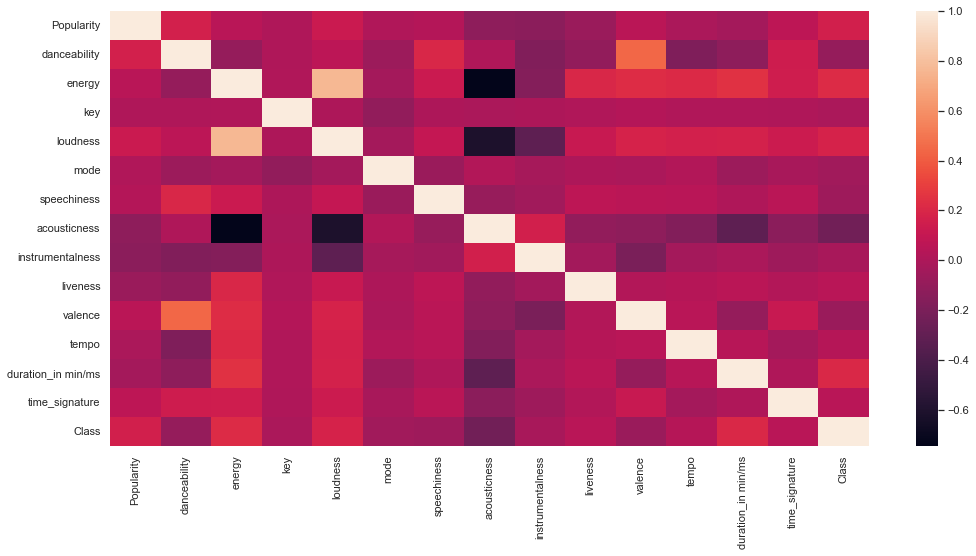

In [ ]:
sns.heatmap(df.drop(cat_features, axis=1).corr())

In [ ]:
X.drop(['energy', 'valence', 'loudness'], axis=1, inplace=True)

Масштабируем данные по разным алгоритмам. 

In [ ]:
scaler = StandardScaler()
x_standard = scaler.fit_transform(X)

In [ ]:
scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(X)

In [ ]:
x_train_standard, x_test_standard, y_train_standard, y_test_standard = train_test_split(x_standard, y, test_size=0.2, random_state=42)
x_train_minmax, x_test_minmax, y_train_minmax, y_test_minmax = train_test_split(x_minmax, y, test_size=0.2, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
names = ['LogReg', 'DesTree', 'KNN']
classifiers = [
    LogisticRegression(max_iter=100, class_weight='balanced', random_state=42),
    # SVC(class_weight='balanced', max_iter=100, probability=True),
    DecisionTreeClassifier(class_weight='balanced', random_state=42), 
    KNeighborsClassifier()]

Создам dict class_scores, который будет хранить в качестве ключей метрики, а внутри них dict с модель - результат метрики

In [ ]:
scores = [
    'roc_auc_ovr', 'roc_auc_ovo',
    'accuracy',
    'precision_micro', 'precision_macro',
    'recall_micro', 'recall_macro',
    'f1_micro', 'f1_macro'
    ]
class_scores_standard = {x : dict() for x in scores}
class_scores_minmax = {x : dict() for x in scores}

In [ ]:
def write_scores(classifier, x_train, y_train, class_scores, name):
    for score in scores:
        class_scores[score][name] = np.mean(cross_val_score(
            classifier, 
            x_train, 
            y_train, 
            cv=5, 
            scoring=score
            )
        )

In [ ]:
def write_const_scores(y_train, y_pred, y_pred_proba, class_scores, name):
    class_scores['accuracy'][name] = accuracy_score(y_train, y_pred)
    class_scores['precision_micro'][name] = precision_score(y_train, y_pred, average='micro', zero_division=0)
    class_scores['precision_macro'][name] = precision_score(y_train, y_pred, average='macro', zero_division=0)
    class_scores['recall_micro'][name] = recall_score(y_train, y_pred, average='micro', zero_division=0)
    class_scores['recall_macro'][name] = recall_score(y_train, y_pred, average='macro', zero_division=0)
    class_scores['f1_micro'][name] = f1_score(y_train, y_pred, average='micro', zero_division=0)
    class_scores['f1_macro'][name] = f1_score(y_train, y_pred, average='macro', zero_division=0)
    class_scores['f1_macro'][name] = f1_score(y_train, y_pred, average='macro', zero_division=0)
    class_scores['roc_auc_ovo'][name] = roc_auc_score(y_train, y_pred_proba, multi_class='ovo')
    class_scores['roc_auc_ovr'][name] = roc_auc_score(y_train, y_pred_proba, multi_class='ovr')

In [ ]:
def learn_model(x_train, y_train, class_scores, verbose=True):
    for i, classifier in enumerate(classifiers):
        classifier.fit(x_train, y_train)
        write_scores(classifier, x_train, y_train, class_scores, names[i])
        
        if verbose:
            print(f"{names[i]} done")

In [ ]:
learn_model(x_train_standard, y_train_standard, class_scores_standard, verbose=True)

LogReg done
DesTree done
KNN done


In [ ]:
learn_model(x_train_minmax, y_train_minmax, class_scores_minmax, verbose=True)

LogReg done
DesTree done
KNN done


Теперь посмотрим на метрики при изменении константного класса, создам аналог class_scores, только теперь вместо моделей, будут "модели константных классов"

In [ ]:
def model_const(y_train):
    class_scores = {x : dict() for x in scores}
    for i in range(11):
        y_pred = np.ones(len(y_train)) * i
        y_pred_proba = np.hstack((np.zeros((len(y_train), 10)), np.ones(len(y_train)).reshape(len(y_train), 1)))
        write_const_scores(y_train, y_pred, y_pred_proba, class_scores, i)
    return class_scores

Визуализируем и посмотрим, на каком константном классе метрика выше, а на каком выше. Смотреть то же самое на minmax не имеет смысла, так как модели не обучаются по данным x_scaler или x_minmax, таргет всегда одинаковый

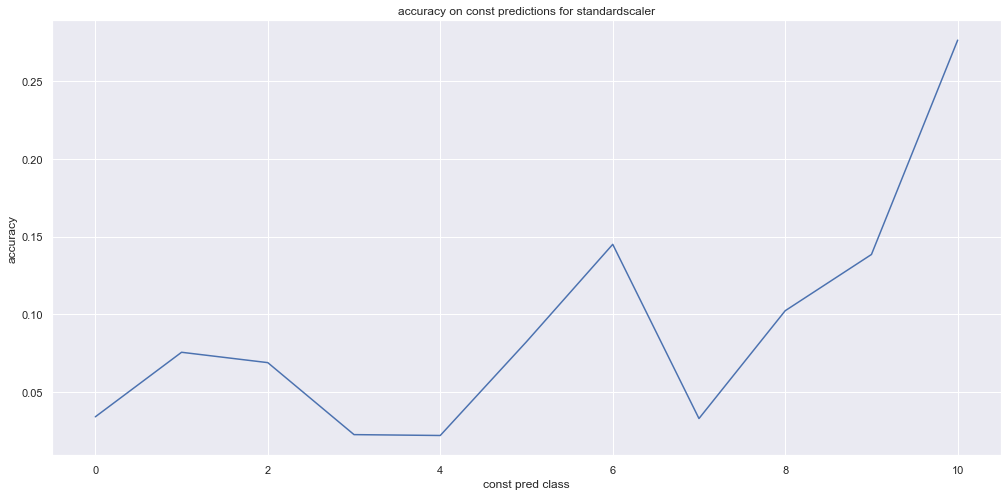

In [ ]:
class_scores_const = model_const(y_train_standard)

plt.plot(list(class_scores_const['accuracy'].keys()), list(class_scores_const['accuracy'].values()))
plt.title('accuracy on const predictions for standardscaler')
plt.xlabel('const pred class')
plt.ylabel('accuracy')
plt.show()

Теперь посмотрим на preicsion micro 

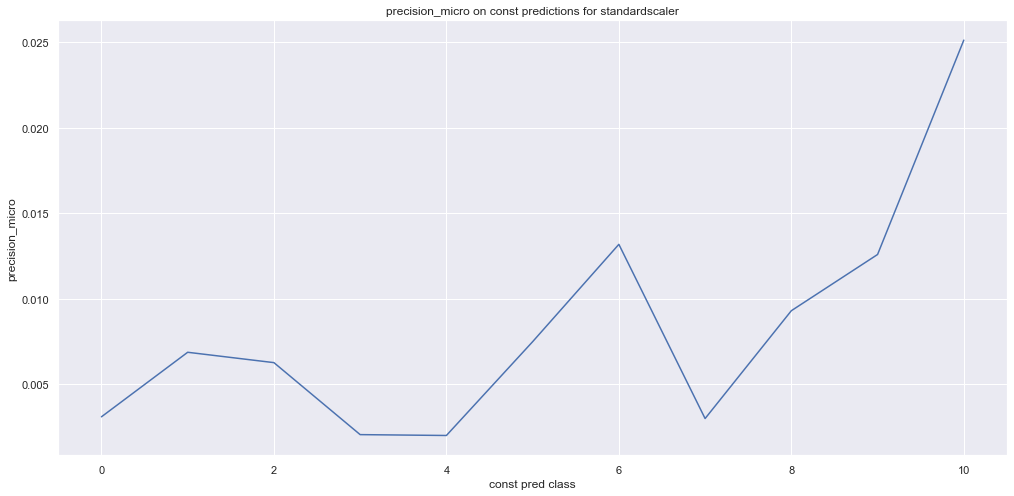

In [ ]:
class_scores_const = model_const(y_train_standard)

plt.plot(list(class_scores_const['precision_macro'].keys()), list(class_scores_const['precision_macro'].values()))
plt.title('precision_micro on const predictions for standardscaler')
plt.xlabel('const pred class')
plt.ylabel('precision_micro')
plt.show()

Можно заметить, что самая высокая точность при константном классе 10 или 6, а самая маленькая 4 и 3. Это можно объяснить дисбалансом в количестве этих классов, в этом можно убедиться:

<AxesSubplot:>

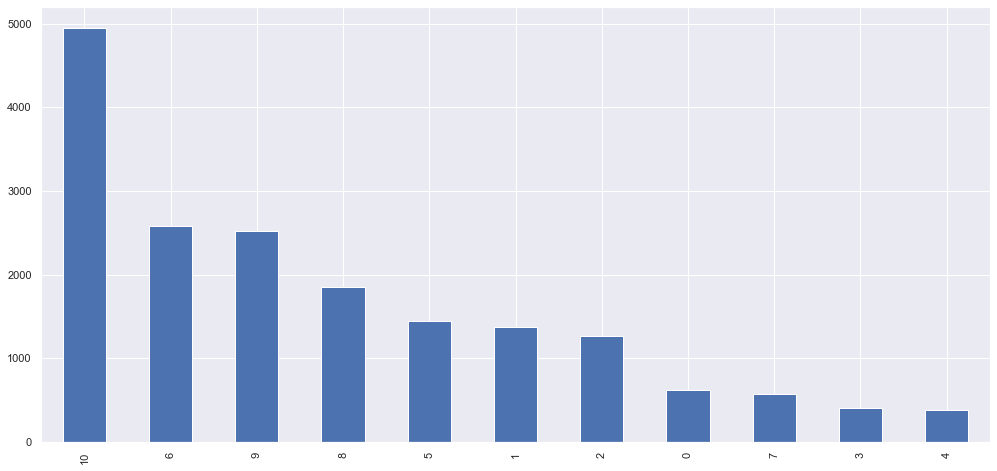

In [ ]:
y.value_counts().plot(kind='bar')

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Теперь визуализируем полученные метрики на разных моделях: LogReg, DesTree и KNN

<AxesSubplot:title={'center':'StandardScaler'}>

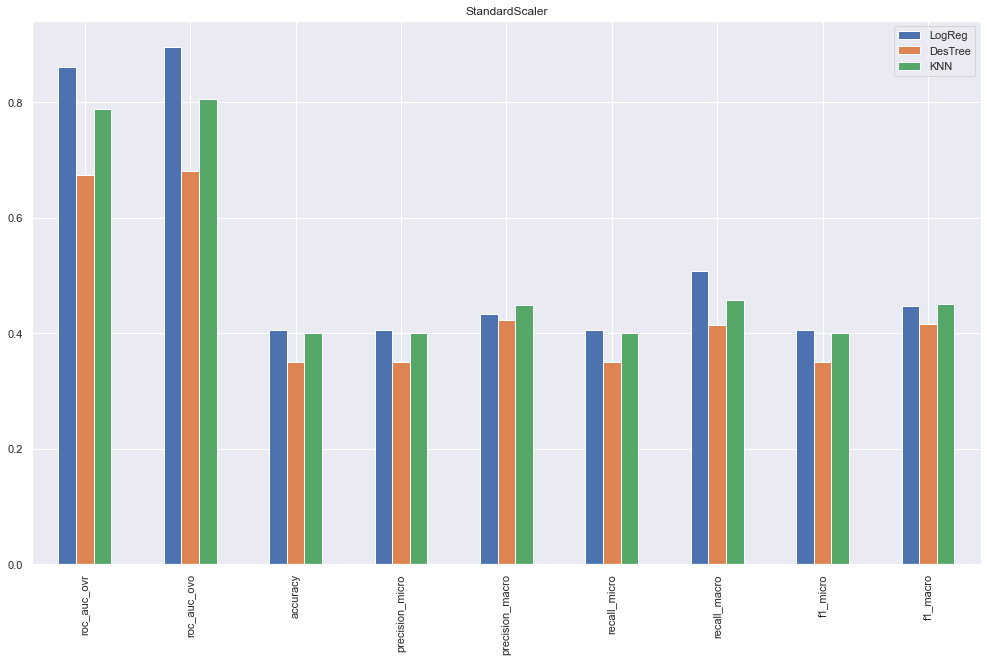

In [ ]:
df_scores_standard = pd.DataFrame(class_scores_standard)

df_scores_standard.T.plot.bar(figsize=(17, 10), title='StandardScaler')

<AxesSubplot:title={'center':'MinMaxScaler'}>

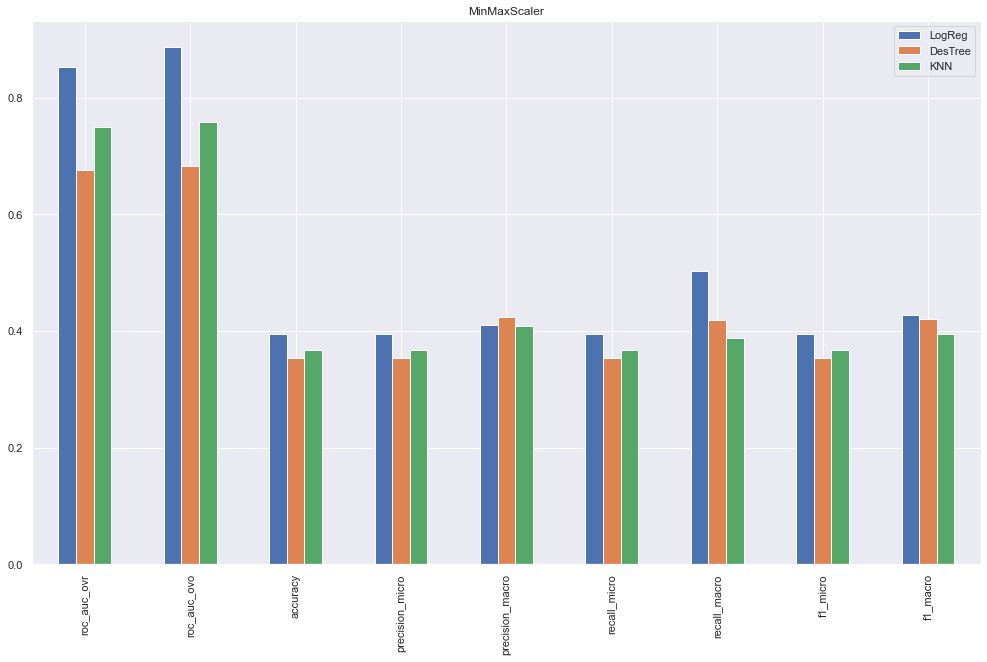

In [ ]:
df_scores_minmax = pd.DataFrame(class_scores_minmax)

df_scores_minmax.T.plot.bar(figsize=(17, 10), title='MinMaxScaler')

Так как цель у нас не подвести будущих фанатов и сделать диски по определенному жанру, определять в приоритете точнее, чем больше. Выберем в качестве метрики precision_macro(посчитать сначала для precision для каждого класса отдельно, а потом усреднить)

In [ ]:
class_scores_standard['precision_macro']

{'LogReg': 0.4335930424060329,
 'DesTree': 0.4221760533220088,
 'KNN': 0.44852475452004537}

In [ ]:
class_scores_minmax['precision_macro']

{'LogReg': 0.4098778812841095,
 'DesTree': 0.42358377420321486,
 'KNN': 0.40779248068323204}

Выберем модель KNN на Standard, так как этот алгоритм показывает лучшие результаты. Теперь найдем лучшие гиперпараметры для этой модели

In [ ]:
param_knn = {
    'n_neighbors' : np.arange(3, 10),
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2],
}

In [ ]:
search = GridSearchCV(
    KNeighborsClassifier(),
    param_knn, 
    cv=5,
    scoring='precision_macro',
    n_jobs=-1,
)
search.fit(x_train_standard, y_train_standard)
print(f"best param: {search.best_params_} best score: {search.best_score_}" )

best param: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'} best score: 0.4783808898540588


Визуализируем метрику по количеству соседей:

Text(0, 0.5, 'precision macro')

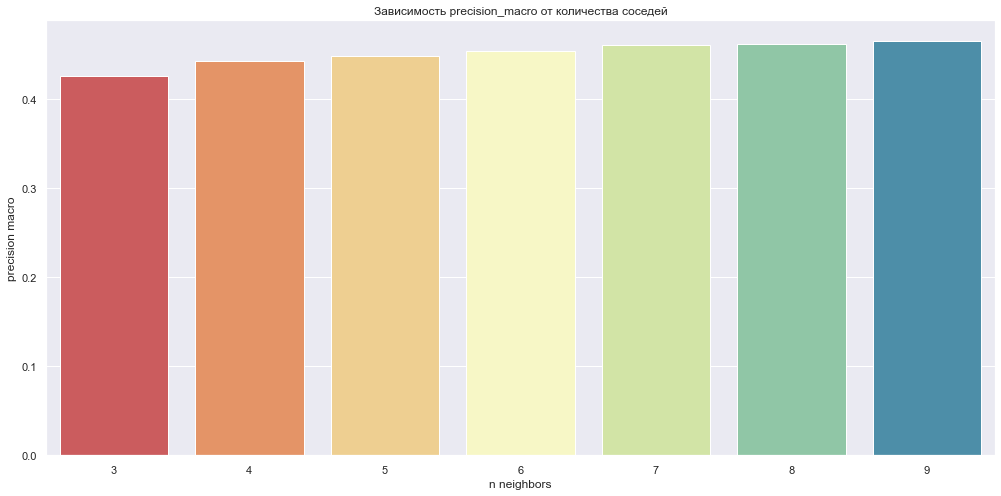

In [ ]:
n_neighbors_score = pd.DataFrame(search.cv_results_).groupby(['param_n_neighbors']).mean()['mean_test_score']
sns.barplot(x=n_neighbors_score.index, y=n_neighbors_score.values, palette='Spectral')
plt.title("Зависимость precision_macro от количества соседей")
plt.xlabel('n neighbors')
plt.ylabel('precision macro')

В среднем у n=9 метрика выше.

In [ ]:
best_clf = KNeighborsClassifier()
best_clf.set_params(**search.best_params_)

best_clf.fit(x_train_standard, y_train_standard)
y_pred = best_clf.predict(x_train_standard)

precision_score(y_train_standard, y_pred, average='macro')

0.586065771624808

## Обработка данных

Посмотрим как данные коррелируют:

Text(0.5, 1.0, 'Корреляция признаков')

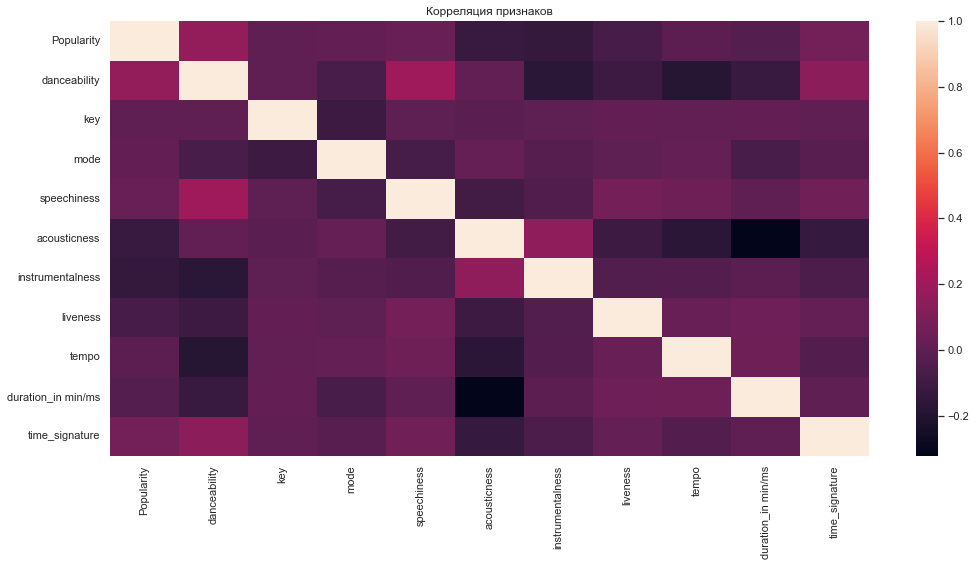

In [ ]:
sns.heatmap(X.corr())
plt.title("Корреляция признаков")

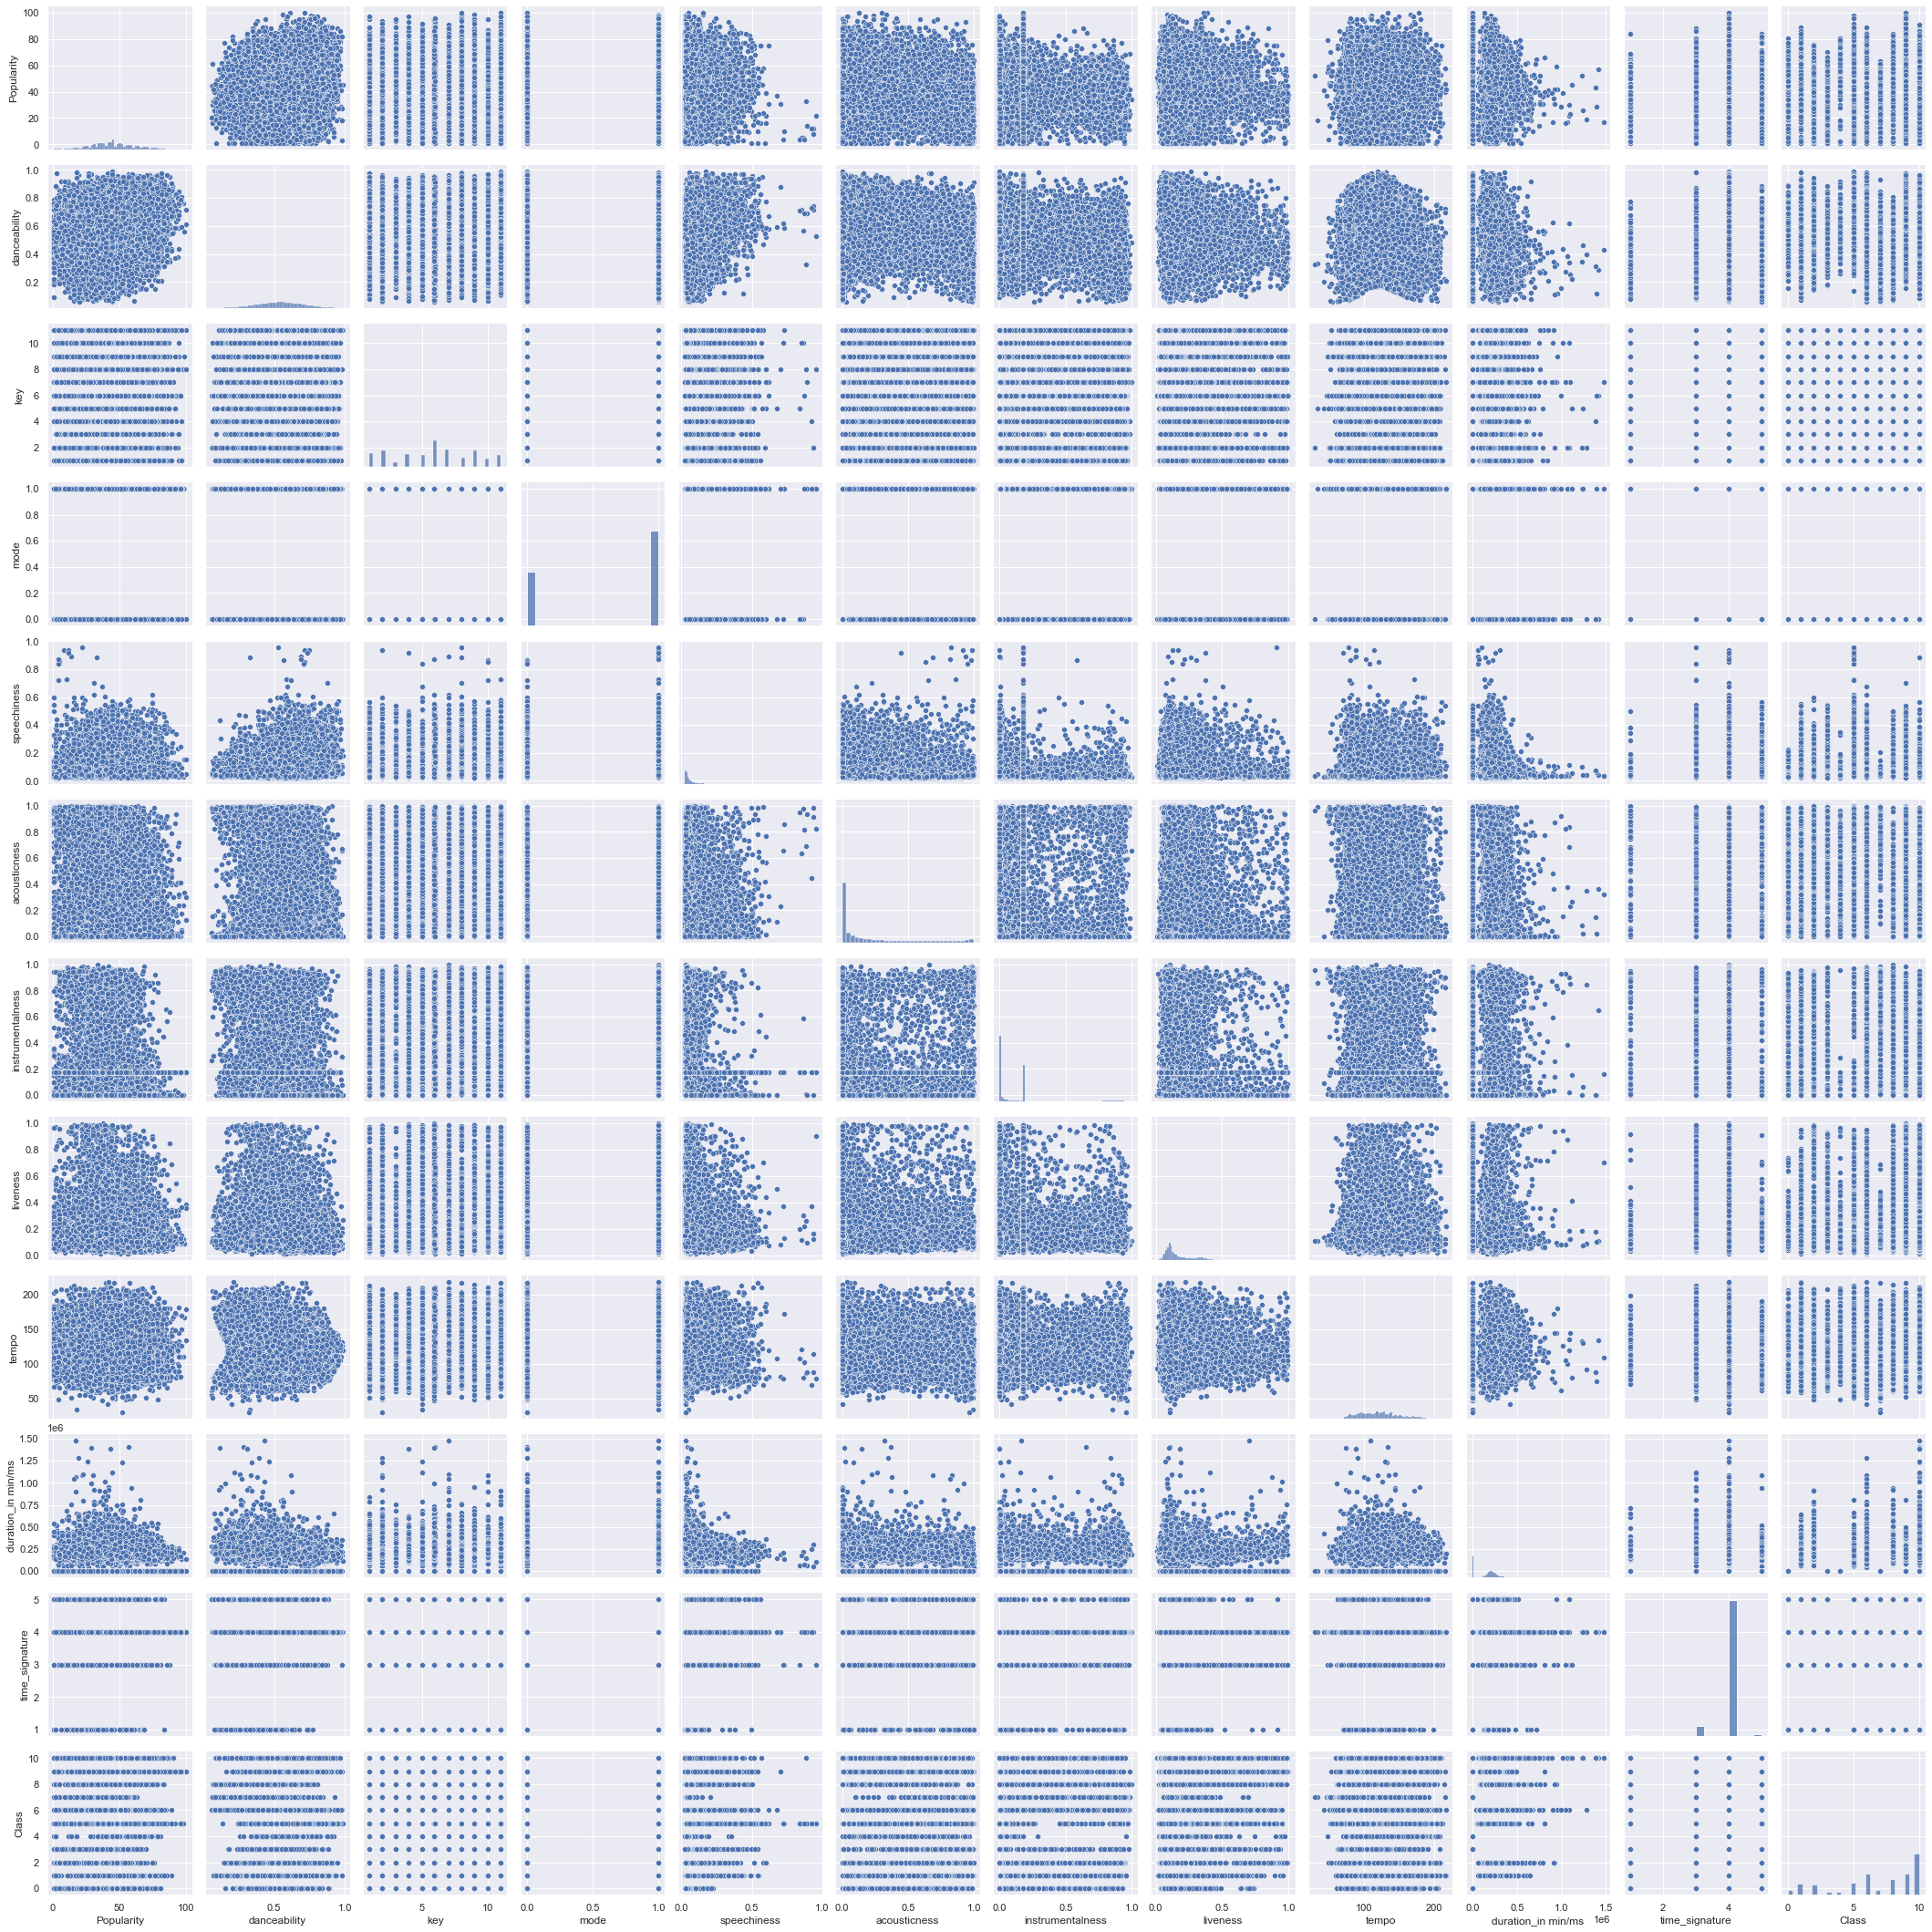

In [ ]:
sns.pairplot(X.join(y))

Теперь попробуем удалять или добавлять некоторые фичи:

In [ ]:
X_new = X.copy()
y_new = y.copy()

X_new.drop(['key'], axis=1, inplace=True)

temp_x = pd.DataFrame()
for i, col in enumerate(X_new.columns):
    for j in X_new.columns:
        if col != j:
            temp_x[f"{col}_{j}"] = X_new[col] * X_new[j]
X_new = X_new.join(temp_x)

Выделим важные фичи с помощью KBest

In [ ]:
k_score = {}
for i in range(10, 90, 5):
    kbest = SelectKBest(f_regression, k=i)
    kbest.fit_transform(X_new, y_new)

    X_new_upd = X_new[[*kbest.get_feature_names_out()]]

    scaler = StandardScaler()
    x_standard = scaler.fit_transform(X_new_upd)

    x_train, x_test, y_train, y_test = train_test_split(x_standard, y_new, test_size=0.2, random_state=42)

    best_clf.fit(x_train, y_train)
    y_pred = best_clf.predict(x_train)

    k_score[i] = precision_score(y_train, y_pred, average='macro')

Визуализируем:

Text(0, 0.5, 'precision macro')

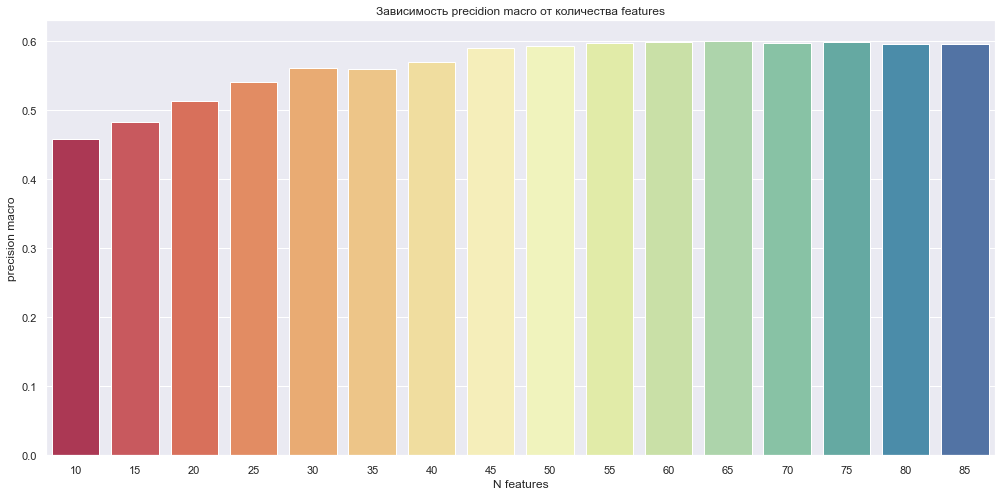

In [ ]:
sns.barplot(x=list(k_score.keys()), y=list(k_score.values()), palette="Spectral")
plt.title("Зависимость precidion macro от количества features")
plt.xlabel("N features")
plt.ylabel("precision macro")

Самый высокий показатель у количества 65

In [ ]:
kbest = SelectKBest(f_regression, k=65)
kbest.fit_transform(X_new, y_new)

X_new_upd = X_new[[*kbest.get_feature_names_out()]]

scaler = StandardScaler()
x_standard = scaler.fit_transform(X_new_upd)

x_train, x_test, y_train, y_test = train_test_split(x_standard, y_new, test_size=0.2, random_state=42)

best_clf.fit(x_train, y_train)
y_pred = best_clf.predict(x_train)

precision_score(y_train, y_pred, average='macro')

0.6002046377386919

Смотрим!!!

In [ ]:
y_pred = best_clf.predict(x_test)

precision_score(y_test, y_pred, average='macro')

0.4921375947514066

Выводы:
- я пыталась играться с фичами, удалять какие-то аномалии, линейно-зависимые признаки, но это в основном только ухудшало модель
- SVC я снова попробовала и снова удалила, так как данных слишком много. Я пыталась ставить количество итераций поменьше, но результата особенно не было, а на бОльших количествах мой комп умирал
- жаль, что итог получился не таким впечатляющим. Хотя изначально он был вообще около 0.45. Возможно, такой датасет, потому что я пыталась что-то перепробовать